In [286]:
#Incase face isssues installing wordcloud refer below link and install whl for your OS
# https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud
# pip install wordcloud
#!pip install beautifulsoup4
# pip install -U textblob
# python -m textblob.download_corpora
# above command is not pip install but python download readit carefully :)


In [364]:
import numpy as np
import pandas as pd
import spacy
from  textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
nlp = spacy.load('en_core_web_lg')

In [2]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [39]:
pd.set_option('display.max_colwidth', None)

In [16]:
data = pd.read_csv('./data/twitterdata1.csv')

In [17]:
# sentiment - 0 means negative
# sentiment - 1 menas positive
data

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0
...,...,...
3995,i just graduated,1
3996,Templating works; it all has to be done,1
3997,mommy just brought me starbucks,1
3998,@omarepps watching you on a House re-run...lov...,1


In [18]:
data['sentiment'].value_counts()

0    2000
1    2000
Name: sentiment, dtype: int64

## Word Counts

In [15]:
len('Lets understand text data cleaning'.split())

5

In [22]:
data['twitts'].apply(lambda x: len(str(x).split()))

0       10
1        7
2       12
3        6
4       26
        ..
3995     3
3996     8
3997     5
3998     8
3999    16
Name: twitts, Length: 4000, dtype: int64

In [23]:
data['word_count'] = data['twitts'].apply(lambda x: len(str(x).split()))

In [24]:
data.sample(5)

,twitts,sentiment,word_count
612,Whuuurrrrr - glands really swollen now. Guess ...,0,12
2584,"@Avinio im taking her to rotschild, beach, shu...",1,22
1533,Lovin' her Lululemon shorts...maybe I should s...,0,19
20,"@DanieSass so IDK when it happened or how, but...",0,21
471,Hope your okay,0,3


In [25]:
data['word_count'].max()

32

In [26]:
data['word_count'].min()

1

In [30]:
data['word_count'].describe()

count    4000.000000
mean       13.281000
std         6.933943
min         1.000000
25%         7.000000
50%        12.000000
75%        19.000000
max        32.000000
Name: word_count, dtype: float64

In [40]:
data[data['word_count']==32]

,twitts,sentiment,word_count
174,ohhh 2 write bak 2 ppl u hav 2 put their names 1st evn on ur phone! ughh this whole time i thought i was beastin n im just talkn 2 myself,0,32
657,I need a bf! LOL anyone wanna sign up haha. The guy I like just broke up with his gf too bad schools over I won't be able to talk to him,0,32
1068,@amytweets i am glad to hear you are all right i am very good thanks and i no it was very hard work i couldnt do and i have been let ...,0,32
1474,Shit happens But Why ??? I hate this part of life fuck it all ! i feel so sad but why what do i think and why do i think it ?,0,32
1697,well its all most 6am and i still haven't gone to bed yet! i dont know y i stay up this late. i'm not tired right now but i will be later,0,32


In [37]:
data[data['word_count']==1]

,twitts,sentiment,word_count
385,homework,0,1
691,@ekrelly,0,1
1124,disappointed,0,1
1286,@officialmgnfox,0,1
1325,headache,0,1
1897,@MCRmuffin,0,1
2542,Graduated!,1,1
2947,reading,1,1
3176,@omeirdeleon,1,1
3470,www.myspace.com/myfinalthought,1,1


## Character Count

In [57]:
b = ('hello world')
len(b)
# here we have 10 chars & 1 white space

11

In [53]:
a = 'hello world'.split()
a

['hello', 'world']

In [54]:
''.join(a)

'helloworld'

In [55]:
# To remove white spaces
def char_counts(x):
    s = x.split()
    x = ''.join(s)
    return len(x)

In [56]:
char_counts(b)

10

In [58]:
data['char_count']= data['twitts'].apply(lambda x: char_counts(str(x)))

In [60]:
data.head()

,twitts,sentiment,word_count,char_count
0,is bored and wants to watch a movie any suggestions?,0,10,43
1,back in miami. waiting to unboard ship,0,7,32
2,"@misskpey awwww dnt dis brng bak memoriessss, I thnk I'm sad. LoL",0,12,54
3,ughhh i am so tired blahhhhhhhhh,0,6,27
4,@mandagoforth me bad! It's funny though. Zachary Quinto is only there for a few though. &amp; to reply just put the @ symbol before the name!,0,26,116


## Average Word Length In Each Row

In [61]:
data['avg_word_len'] = data['char_count']/data['word_count']

In [62]:
data.sample(2)

,twitts,sentiment,word_count,char_count,avg_word_len
1913,7:25 PM.. I had a final exam today... and I still stay my LAB In order to submit final term paper.,0,21,78,3.714286
2357,@kellykenniff i love you,1,4,21,5.250000


## Stop Words Count



In [64]:
print(stopwords)

{'around', 'anyway', 'we', 'keep', 'few', 'make', 'full', 'is', 'there', 'serious', 'call', 'this', 'otherwise', 'might', 'itself', '’ll', 'nine', 'should', 'either', 'the', 'did', 'with', 'further', 'perhaps', 'nobody', 'seems', "'m", 'ours', 'wherever', 'namely', 'last', 'just', 'becoming', 'among', 'or', 'toward', 'up', 'often', 'thereby', 'may', 'a', 'whither', 'herself', 'us', 'through', 'its', 'name', 'due', 'seeming', 'were', 'becomes', 'whereafter', 'anywhere', 'below', 'most', 'everyone', 'using', 'thereupon', 'only', 'anyone', 'nevertheless', 'hereafter', 'more', 'wherein', 'own', 'top', 'has', 'our', 'which', 'six', 'been', 'per', 'ten', 'without', 'say', 'whatever', 'everywhere', 'beforehand', 'why', 'once', 'to', 'myself', 'first', 'if', "n't", 'although', 'yourself', 'have', '‘s', 'always', 'back', 'every', 'besides', 'her', 'these', 'though', 'then', 'thru', 'could', 'onto', 'again', "'re", 'latterly', 'hereupon', 'beside', 'what', '‘re', 'towards', 'any', 'fifty', 'on',

In [65]:
# length of stopwords

len(stopwords)

326

In [66]:
text = 'I have been working on this project since 2020'

In [67]:
x = text.split()
x

['I', 'have', 'been', 'working', 'on', 'this', 'project', 'since', '2020']

In [69]:
len([t for t in text.split() if t in stopwords])

5

In [70]:
[t for t in text.split() if t in stopwords]

['have', 'been', 'on', 'this', 'since']

In [77]:
data['stop_words_count']=data['twitts'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [78]:
data.sample(20)

,twitts,sentiment,word_count,char_count,avg_word_len,stop_words_count
1689,ohh and hell begins tomorrow... again. i dont wanna goooo,0,10,48,4.800000,2
2597,angels and demonds...i saw that movie yesterday its interesting.....like it.,1,10,67,6.700000,3
2476,@funkycarla8 hi hun when your friend sends pic of @Schofe can you possible send it to me for the gallery please? would be fab!!! xxx,1,25,108,4.320000,12
1525,@NAYMEZ I wish I was on cloud 9,0,8,24,3.000000,2
3689,@stesimpson Good start to the week!,1,6,30,5.000000,2
2796,"oh, Squidbillies, your mindless entertainment is so appreciated at this time of night!!!",1,13,76,5.846154,6
2642,posted it,1,2,8,4.000000,1
1176,"@LiveArtliFe well, if I had more folks on BBM, I would use that. I have an app that I use for all the rest but it kills my battery",0,29,102,3.517241,14
2737,In the garden with my parents and the dogs tres hot today. Was out driving today with my mom. Went through Bangor and donaghadee,1,24,105,4.375000,10
981,@speedyb I can't get that eminem album that u did for me to work,0,14,51,3.642857,7


## Count Hashtags & @Mentions

In [79]:
text = 'counting #hashtags & @Mentions'

In [80]:
text.split()

['counting', '#hashtags', '&', '@Mentions']

In [84]:
[t for t in text.split() if t.startswith('#')]

['#hashtags']

In [85]:
len([t for t in text.split() if t.startswith('#')])

1

In [92]:
data['hashtasg_count']=data['twitts'].apply(lambda x:len([t for t in x.split() if t.startswith('#')]))

In [93]:
data.sample(2)

,twitts,sentiment,word_count,char_count,avg_word_len,stop_words_count,hashtasg_count
689,@Annnnnaaaaa and apparently neither is Sir Allen,0,7,42,6.000000,3,0
3610,"Follow: @Josephine23xo, I'll be updating there all about my new site! I won't be using this Twitter anymore seen as Miley won her award",1,24,112,4.666667,10,0


In [94]:
data['mention_count']=data['twitts'].apply(lambda x:len([t for t in x.split() if t.startswith('@')]))

In [96]:
data.sample(2)

,twitts,sentiment,word_count,char_count,avg_word_len,stop_words_count,hashtasg_count,mention_count
1517,"Making pesto pasta for memy 2nd bday dinner! Her bday was last tues, but yknw wat happened den &amp; I messed up d cake I bought her oops!",0,28,111,3.964286,6,0,0
340,I forgot my laptop with my beau. text only now,0,10,37,3.700000,5,0,0


## Numeric Digit Count

In [97]:
text = 'my lucky number is 7'

In [98]:
text.split()

['my', 'lucky', 'number', 'is', '7']

In [100]:
text.split()[4]

'7'

In [101]:
text.split()[4].isdigit()

True

In [106]:
[t for t in text.split() if t.isdigit()]

['7']

In [107]:
data['numeric_count']=data['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [108]:
data.sample(2)

,twitts,sentiment,word_count,char_count,avg_word_len,stop_words_count,hashtasg_count,mention_count,numeric_count
808,Poor Roxana Saberi i hope she's well. She's one of my favorite @npr foreign correspondants. I hope they'll set her free,0,21,99,4.714286,5,0,1,0
195,trying to figure out tweetdeck and failing miserably,0,8,45,5.625000,3,0,0,0


## Upper Case Word Counts
### Generally upper case text has some kind of emotions

In [109]:
'i am angry' # Has less intensity of emotions
'I AM ANGRY' # More intensity of emotions

'I AM ANGRY'

In [110]:
data['upper_counts']=data['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [111]:
data.sample(2)

,twitts,sentiment,word_count,char_count,avg_word_len,stop_words_count,hashtasg_count,mention_count,numeric_count,upper_counts
1881,Some guy keeps sending me invites to GoW2 it's bugging the hell out of me.,0,15,60,4.000000,5,0,0,0,0
539,@grayskyes http://twitpic.com/6p2m3 - That is sad I wonder which one used to be mine?,0,14,72,5.142857,6,0,1,0,1


## Lower Conversion

In [112]:
data['twitts']=data['twitts'].apply(lambda x: str(x).lower())

In [113]:
data.sample(4)

,twitts,sentiment,word_count,char_count,avg_word_len,stop_words_count,hashtasg_count,mention_count,numeric_count,upper_counts
2537,@seuj sardinia for a few days of pre-graduation sunshine http://bit.ly/fjkkj,1,10,67,6.700000,4,0,1,0,0
1027,why won't twitter let me block people migraines are the worst. anyone fancy going to work for me? no? didn't think so,0,22,96,4.363636,8,0,0,0,0
3542,"@mylanta yeah, i'm with ya.....it flew over my head at first too",1,12,53,4.416667,6,0,1,0,0
3695,is at work on a saturday. woo uv tonight,1,9,32,3.555556,3,0,0,0,1


## Contraction to Expansion

In [115]:
# https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions

In [116]:
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

In [ ]:
# We can add more key value pairs to this list if we want to 

In [122]:
"hey ain't going".replace("ain't","am not")

'hey am not going'

In [125]:
#for k in cList:
#    print(k)
#    print(cList[k])

In [124]:
def cont_to_exp(x):
    if type(x) is str:
        for k in cList:
            value = cList[k]
            x = x.replace(k, value)
        return(x)
    else:
        return(x)

In [127]:
cont_to_exp("you've")

'you have'

In [128]:
%%timeit

data['twitts'] = data['twitts'].apply(lambda x: cont_to_exp(x))

101 ms ± 769 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [129]:
data.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_len,stop_words_count,hashtasg_count,mention_count,numeric_count,upper_counts
447,so cold today... kinda feeling a bit blue from all this cold.,0,12,50,4.166667,4,0,0,0,0
1815,i missed the tornado last night.,0,6,27,4.500000,2,0,0,0,1
491,rsvp only for the virgin megastore open bar. try again tomorrow.,0,11,54,4.909091,4,0,0,0,1
2233,one final today then gonna watch bolt! haha,1,8,36,4.500000,2,0,0,0,0
1998,last ride with my baby girl alexus,0,7,28,4.000000,2,0,0,0,0


## Count & Remove Emails

In [140]:
data[data['twitts'].str.contains('@hotmail.com')]

,twitts,sentiment,word_count,char_count,avg_word_len,stop_words_count,hashtasg_count,mention_count,numeric_count,upper_counts
3713,@securerecs arghh me please markbradbury_16@hotmail.com,1,5,51,10.2,0,0,1,0,0


In [141]:
import re

In [145]:
text = "my email id is anc@email.com, aa@gmail.com"

In [149]:
myexp = re.findall(r'([a-z0-9._-]+@[a-z0-9+._-]+\.[a-z09+_-]+\b)',text)
myexp

['anc@email.com', 'aa@gmail.com']

In [155]:
data['emails']=data['twitts'].apply(lambda x :re.findall(r'([a-z0-9._-]+@[a-z0-9+._-]+\.[a-z09+_-]+)',x))

In [156]:
data.sample(8)

,twitts,sentiment,word_count,char_count,avg_word_len,stop_words_count,hashtasg_count,mention_count,numeric_count,upper_counts,emails,email_counts
1735,@wolwol crashed wol. no one survived,0,6,31,5.166667,1,0,1,0,0,[],0
699,@timotheosok it is really nasty out,0,5,30,6.000000,2,0,1,0,0,[],0
1930,gotta go to work. for. 8 hours. ugh. and heres the thing. it is like a summer thing. ya im that nice,0,21,79,3.761905,4,0,0,1,5,[],0
2443,"i'm trying to work, but am highly distracted what with the interesting people to meet on twitter",1,17,80,4.705882,8,0,0,0,0,[],0
1979,think i ate a bad leftover subway sandwich,0,8,35,4.375000,1,0,0,0,1,[],0
975,my stomach hurts. and i'm bored.,0,6,27,4.500000,1,0,0,0,0,[],0
3857,"twitter sucks, i'm only on here to follow ellen, oprah and shane so i dont follow me because i'm never on here",1,22,89,4.045455,11,0,0,0,1,[],0
2246,@maxenemagalona :-d i am a big fan of your dad! isolove his songs....hi max!,1,14,63,4.500000,6,0,1,0,1,[],0


In [158]:
data['email_counts']= data['emails'].apply(lambda x:len(x))

In [162]:
x = text


In [163]:
# removing the email id or subtracting it

re.sub(r'([a-z0-9._-]+@[a-z0-9+._-]+\.[a-z09+_-]+)',"",x)

'my email id is , '

In [164]:
data['twitts']=data['twitts'].apply(lambda x:re.sub(r'([a-z0-9._-]+@[a-z0-9+._-]+\.[a-z09+_-]+)',"",x))

## Count URL & Remove It

In [173]:
txt = "this is google.com URL linkedin profile https://www.linkedin.com/in/nitin-ai--/....hello https://www.youtube.com/watch?v=GViNRr-wanE&list=RDCMUC2wMHF4HBkTMGLsvZAIWzRg&index=16"

In [174]:
urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', txt)

In [175]:
urls

['https://www.linkedin.com/in/nitin-ai--/....hello',
 'https://www.youtube.com/watch?v=GViNRr-wanE&list=RDCMUC2wMHF4HBkTMGLsvZAIWzRg&index=16']

In [178]:
data['url_flag']= data['twitts'].apply(lambda x: len(re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x)))

In [180]:
data[data['url_flag']>0]

,twitts,sentiment,word_count,char_count,avg_word_len,stop_words_count,hashtasg_count,mention_count,numeric_count,upper_counts,emails,email_counts,url_flag
16,@brianquest i made 1 fo u 2: http://bit.ly/eid8a i tried but its kinda ugly cuz i couldnt find pics,0,19,81,4.263158,3,0,1,1,3,[],0,1
98,heading to work http://twitpic.com/4eojz,0,4,37,9.250000,1,0,0,0,0,[],0,1
99,@blondeblogger http://twitpic.com/4w8hk - i'm so sad this is so blurry!,0,10,62,6.200000,4,0,1,0,0,[],0,1
144,i miss you â« http://blip.fm/~8lc2f,0,5,32,6.400000,1,0,0,0,1,[],0,1
183,photo: miss germany http://tumblr.com/xf825f012,0,4,44,11.000000,0,0,0,0,0,[],0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,new staark video of &quot;sweet release&quot; live at wick studios! http://staark.net/video.php ... we will probably edit it a bit soon tho,1,20,118,5.900000,4,0,0,0,1,[],0,1
3826,http://tinyurl.com/kwmynq helmet - unsung to start your day http://plurk.com/p/yshbc,1,9,76,8.444444,2,0,0,0,0,[],0,2
3837,@r0ckergirl14 wow sweet again!! http://twitpic.com/69b67,1,5,52,10.400000,0,0,1,0,0,[],0,1
3958,someone has been creative with my #deskmess while was chatting with @omar_musa http://twitpic.com/7jgf1,1,13,91,7.000000,7,1,1,0,0,[],0,1


In [183]:
data['twitts']=data['twitts'].apply(lambda x:re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '',x) )

# Remove RT - ReTweet Data

In [189]:
text = 'rt @nitin retweet this is a '

In [191]:
re.sub(r'\brt\b', '',text).strip()

'@nitin retweet this is a'

In [192]:
data['twitts'] = data['twitts'].apply(lambda x:re.sub(r'\brt\b', '',x).strip() )

## Special Character & Punctuation Removal

In [201]:
# w for alphanumeric char & special chars
# ^ means other thna this
re.sub(r'[\w]+', "", text).strip()

'@'

In [202]:
re.sub(r'[^\w]+', "", text).strip()

'rtnitinretweetthisisa'

In [203]:
# Giving space after w
re.sub(r'[^\w ]+', "", text).strip()

'rt nitin retweet this is a'

In [204]:
data['twitts'] = data['twitts'].apply(lambda x:re.sub(r'[^\w ]+', "", x) )

In [206]:
data['twitts'].sample(5)

3002    amber_lily13 ill tell u the lame story laterugh still got to talk to steve tho
1392                                     i want to see alice in chains in the 90s  lt3
1078                                           morning  bus replacement services today
653                                                 ugggsleepyand have to go to brunch
2082                                   i fell asleep on the couch anddd i miss my butt
Name: twitts, dtype: object

## Removing Multiple spaces

In [207]:
text = 'Hi There      How      Are  you'

In [209]:
' '.join(text.split())

'Hi There How Are you'

In [212]:
data['twitts'] = data['twitts'].apply(lambda x: ' '.join(x.split())) 

## Remove HTML Tags

In [217]:
#!pip install beautifulsoup4
#!pip install lxml

In [219]:
from bs4 import BeautifulSoup

In [222]:
html ="<html><h1>Hello World & Python</h1></html>"

In [225]:
BeautifulSoup(html,"html.parser").get_text().strip()

'Hello World & Python'

In [227]:
data['twitts'] = data['twitts'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text().strip())

In [228]:
data.sample(3)

,twitts,sentiment,word_count,char_count,avg_word_len,stop_words_count,hashtasg_count,mention_count,numeric_count,upper_counts,emails,email_counts,url_flag
3970,alaerys no one else loves me either people are so boring in rl cept you you always tickle me,1,20,79,3.950000,10,0,1,0,1,[],0,0
2516,follow smoshian so he can have 10k and no one will be harmed,1,13,49,3.769231,9,0,1,0,0,[],0,0
934,randomvector twitter does not work well on my mac i cannot dm you i eez sorreez trip is stressy amp has not actually begun yet,0,23,107,4.652174,4,0,1,0,3,[],0,0


## Remove Accented Chars

In [229]:
text = '''such as résumé and tête-à-tête, they occur frequently in several other European languages, including Spanish, French, Italian, German and Portuguese.

The most common accents are the acute (é), grave (è), circumflex (â, î or ô), tilde (ñ), umlaut and dieresis (ü or ï – the same symbol is used for two different purposes), and cedilla (ç). Accent marks (also referred to as diacritics or diacriticals) usually appear above a character. One exception is the cedilla, which appears directly underneath the letter c; several less common accent marks appear next to the character.'''

In [230]:
text

'such as résumé and tête-à-tête, they occur frequently in several other European languages, including Spanish, French, Italian, German and Portuguese.\n\nThe most common accents are the acute (é), grave (è), circumflex (â, î or ô), tilde (ñ), umlaut and dieresis (ü or ï – the same symbol is used for two different purposes), and cedilla (ç). Accent marks (also referred to as diacritics or diacriticals) usually appear above a character. One exception is the cedilla, which appears directly underneath the letter c; several less common accent marks appear next to the character.'

In [231]:
import unicodedata

In [232]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', errors = 'ignore').decode('utf-8',errors='ignore')
    return(x)

In [233]:
txt = 'such as résumé and tête-à-tête'

In [235]:
remove_accented_chars(txt)

'such as resume and tete-a-tete'

In [237]:
data['twitts'] = data['twitts'].apply(lambda x:remove_accented_chars(x) )

## Removing Stop Words

In [238]:
text = 'Are there any stop words in the text give to us?'

In [240]:
[t for t in text.split() if t not in stopwords]

# Below are the only words that are not the part of stop words

['Are', 'stop', 'words', 'text', 'us?']

In [243]:
#stopwords

In [242]:
len(stopwords)

326

In [244]:
' '.join([t for t in text.split() if t not in stopwords])

'Are stop words text us?'

In [247]:
data['twitts_no_stopwords'] = data['twitts'].apply(lambda x:' '.join([t for t in x.split() if t not in stopwords]) )

In [248]:
data.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_len,stop_words_count,hashtasg_count,mention_count,numeric_count,upper_counts,emails,email_counts,url_flag,twitts_no_stopwords
2909,quotold computers freak me outquot haha chuckmemondays chuck,1,8,61,7.625000,1,2,0,0,0,[],0,0,quotold computers freak outquot haha chuckmemondays chuck
2923,bgstrowger also please note that as you had guests i was exceptionally quiet at kicking out time it was leigh that shouted not me,1,24,111,4.625000,12,0,1,0,1,[],0,0,bgstrowger note guests exceptionally quiet kicking time leigh shouted
3934,tweetakeet that bathrobe is actually a beach robe coverup used to belong to my mother,1,15,73,4.866667,5,0,1,0,0,[],0,0,tweetakeet bathrobe actually beach robe coverup belong mother
2069,morning twitterverse hope you are all doing good im off soon,1,12,57,4.750000,5,0,0,0,0,[],0,0,morning twitterverse hope good im soon
2164,jaespera miss u know what ur getting for ur barfday lol or wait u dont lol,1,16,63,3.937500,3,0,1,0,1,[],0,0,jaespera miss u know ur getting ur barfday lol wait u dont lol


## Convert Into Base or Root Form

In [249]:
text = "I am going for shopping"

In [250]:
def base_form(x):
    x = str(x)
    xlist = []
    doc = nlp(x)
    
    for token in doc:
        var_lemma = token.lemma_
        xlist.append(var_lemma)
        
    return ' '.join(xlist)
        

In [253]:
base_form(text)

'I be go for shop'

In [254]:
# If I dont want to convert pronoun or be to its root

def base_form(x):
    x = str(x)
    xlist = []
    doc = nlp(x)
    
    for token in doc:
        var_lemma = token.lemma_
        if var_lemma == 'PROP' or var_lemma =='be':
            var_lemma = token.text
        xlist.append(var_lemma)
        
    return ' '.join(xlist)

In [255]:
base_form(text)

'I am go for shop'

In [257]:
%%timeit

data['twitts'] = data['twitts'].apply(lambda x: base_form(x))

36.7 s ± 378 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [258]:
data.sample(4)

,twitts,sentiment,word_count,char_count,avg_word_len,stop_words_count,hashtasg_count,mention_count,numeric_count,upper_counts,emails,email_counts,url_flag,twitts_no_stopwords
2152,respectthewest thank you hope all is well with you,1,9,44,4.888889,5,0,1,0,0,[],0,0,respectthewest thank hope
1612,shaycarl I m go to make you a banner out of my hair waitthat would be grossumm sorry that is all I get good luck though p,0,24,108,4.500000,10,0,1,0,2,[],0,0,shaycarl im gonna banner hair waitthat grossumm sorry got good luck p
22,back niggly again today boo so could not train as plan only 15 day til race for life eeek,0,18,81,4.500000,5,0,0,1,0,[],0,0,niggly today boo train planned 15 days til race life eeek
2684,book an appoitment for a pedicure,1,6,31,5.166667,3,0,0,0,0,[],0,0,booking appoitment pedicure


## Removal Common Words

In [260]:
text = ' '.join(data['twitts'])

In [262]:
# Number of chars in the text
len(text)

271804

In [265]:
# Number of words in the text

len(text.split())

54227

In [269]:
text = text.split()

In [271]:
# Counting occurence of words using value_counts

freq_word = pd.Series(text).value_counts()
freq_word

I               2914
to              1457
the             1299
a                968
is               908
                ... 
rudd               1
ato                1
cruzer             1
firefoxafter       1
rerunlovin         1
Length: 9117, dtype: int64

In [273]:
# Getting the top 20 words

fwtop20 = freq_word.head(20)

In [275]:
fwtop20
# These are mostly stopwords
# Most of the words in the text are generally from stop words

I       2914
to      1457
the     1299
a        968
is       908
not      891
my       824
you      795
it       735
and      709
have     623
do       609
in       571
for      521
of       482
m        474
go       469
that     458
get      450
on       427
dtype: int64

In [279]:
data['twitts_nf']= data['twitts'].apply(lambda x:' '.join([t for t in x.split() if t not in fwtop20]) )

In [280]:
data.sample(4)

,twitts,sentiment,word_count,char_count,avg_word_len,stop_words_count,hashtasg_count,mention_count,numeric_count,upper_counts,emails,email_counts,url_flag,twitts_no_stopwords,twitts_nf
2627,oh sorrygood morning twitterbug,1,4,33,8.250000,0,0,0,0,0,[],0,0,oh sorrygood morning twitterbugs,oh sorrygood morning twitterbug
2846,I get flower I feel so special,1,7,27,3.857143,1,0,0,0,2,[],0,0,got flowers feel special,flower feel so special
2595,twittopher that is well good to hear you two are have a nice relaxing sunday evening,1,15,75,5.000000,5,0,1,0,0,[],0,0,twittopher better good hear having nice relaxing sunday evening,twittopher well good hear two are nice relaxing sunday evening
1509,asktechnetuk silverlight control on teh conference presentation not always present so no full screen or fastfwdrvrse,0,16,106,6.625000,7,0,1,0,0,[],0,0,asktechnetuk silverlight controls teh conference presentations present screen fastfwdrvrse,asktechnetuk silverlight control teh conference presentation always present so no full screen or fastfwdrvrse


## Removing Rare Occuring Words

In [281]:
rare20 = freq_word.tail(20)
rare20

ubat             1
ohnotheydidnt    1
loveanalove      1
inform           1
dote             1
possibly         1
dollparts666     1
mp3              1
measurement      1
aubreyoday       1
strand           1
ronterrell       1
anatomny         1
greys            1
eft              1
rudd             1
ato              1
cruzer           1
firefoxafter     1
rerunlovin       1
dtype: int64

In [283]:
data['twitts_nf']= data['twitts_nf'].apply(lambda x:' '.join([t for t in x.split() if t not in rare20]) )

In [284]:
data.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_len,stop_words_count,hashtasg_count,mention_count,numeric_count,upper_counts,emails,email_counts,url_flag,twitts_no_stopwords,twitts_nf
1661,ms longsine mrs ray is teach sophmore english too bad I m in honor but she say I could come back and decorate her room again,0,25,113,4.520000,9,0,0,0,0,[],0,0,ms longsine mrs ray teaching sophmore english bad im honors said come decorate room,ms longsine mrs ray teach sophmore english too bad honor but she say could come back decorate her room again
1667,officialtila how come no reply back tila,0,7,36,5.142857,3,0,1,0,0,[],0,0,officialtila come reply tila,officialtila how come no reply back tila
569,up at 8 am to walk my puppy just recieve my to do list from the fam hello I m an adult officially,0,22,81,3.681818,10,0,0,1,0,[],0,0,8 walk puppies recieved list fam hello im adult officially,up at 8 am walk puppy just recieve list from fam hello an adult officially
1937,tracking do not go yet my room smell gross how do one clean a mouse pad,0,16,65,4.062500,4,0,0,0,0,[],0,0,tracking room smells gross clean mouse pad,tracking yet room smell gross how one clean mouse pad
3952,badmouth someone I really really really hate liar,1,8,48,6.000000,0,0,0,0,6,[],0,0,badmouthing hate liars,badmouth someone really really really hate liar


## Word Cloud Visualisation

In [289]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [290]:
text = ' '.join(data['twitts_nf'])

In [291]:
len(text)

219376

In [301]:
wc = WordCloud(width=1000, height=500).generate(text)

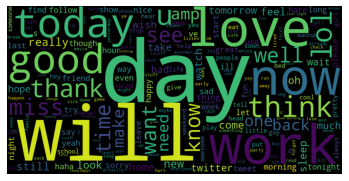

In [302]:
plt.imshow(wc)
plt.axis('off')
plt.show()

## Spelling Correction

In [304]:
#from textblob import TextBlob

In [306]:
text = 'I amm soooo Happpppy for yu'

In [307]:
text_cor = TextBlob(text).correct()
text_cor

TextBlob("I am soon Happpppy for you")

In [308]:
text = 'Heyy Ar you goona goo thr?'

In [310]:
text_cor = TextBlob(text).correct()
text_cor
# Trying hard to correct the spelling to the best I hope :)

TextBlob("Very Or you good go the?")

## Tokenization with Textblob

In [321]:
text = 'Hey I-like learning python#jumbo!! What about you?'

In [322]:
TextBlob(text).words
# Special chars are removed

WordList(['Hey', 'I-like', 'learning', 'python', 'jumbo', 'What', 'about', 'you'])

In [325]:
mylist = []
for token in nlp(text):
    
    mylist.append(token)
mylist

# Here its not removing special chars

[Hey, I, -, like, learning, python#jumbo, !, !, What, about, you, ?]

## Detecting Nouns

In [331]:
text = '''At PayPal (NASDAQ: PYPL), we believe that every person has the right to participate fully in the global economy. Our mission is to democratize financial services to ensure that everyone, regardless of background or economic standing, has access to affordable, convenient, and secure products and services to take control of their financial lives.
.'''

In [332]:
text

'At PayPal (NASDAQ: PYPL), we believe that every person has the right to participate fully in the global economy. Our mission is to democratize financial services to ensure that everyone, regardless of background or economic standing, has access to affordable, convenient, and secure products and services to take control of their financial lives.\n.'

In [333]:
doc = nlp(text)

In [334]:
mylist = []
for noun in doc.noun_chunks:
    mylist.append(noun)
    
mylist

[PayPal,
 NASDAQ,
 PYPL,
 we,
 every person,
 the right,
 the global economy,
 Our mission,
 financial services,
 everyone,
 background,
 economic standing,
 access,
 affordable, convenient, and secure products,
 services,
 control,
 their financial lives]

## Language Translation & Detection
### Need Google API for this

In [335]:
text

'At PayPal (NASDAQ: PYPL), we believe that every person has the right to participate fully in the global economy. Our mission is to democratize financial services to ensure that everyone, regardless of background or economic standing, has access to affordable, convenient, and secure products and services to take control of their financial lives.\n.'

In [338]:
text = 'Hello How are you?'

In [339]:
tb = TextBlob(text)

In [360]:
#tb.detect_language()

In [362]:
#tb.translate('hi')

## Sentiment Analysis Using Textblob

In [371]:
from textblob.sentiments import NaiveBayesAnalyzer
#from textblob.sentiments import BaseSentimentAnalyzer

In [380]:
text = 'Hi i Really Liked the food!!'
text2 = ' Food is not so good'
text3 = ' I am telling you food is not good'
text4 = ' Food is really bad!!'

In [376]:
TextBlob(text, analyzer= NaiveBayesAnalyzer()).sentiment

Sentiment(classification='pos', p_pos=0.5477548219178868, p_neg=0.45224517808211273)

In [378]:
TextBlob(text2, analyzer= NaiveBayesAnalyzer()).sentiment

Sentiment(classification='pos', p_pos=0.5095796315673297, p_neg=0.4904203684326702)

In [379]:
TextBlob(text3, analyzer= NaiveBayesAnalyzer()).sentiment

Sentiment(classification='pos', p_pos=0.5140721148814077, p_neg=0.4859278851185922)

In [381]:
TextBlob(text4, analyzer= NaiveBayesAnalyzer()).sentiment

Sentiment(classification='neg', p_pos=0.3327086183920238, p_neg=0.6672913816079762)

In [383]:
dir(spacy)

['Any',
 'Config',
 'Dict',
 'Errors',
 'Iterable',
 'Language',
 'Path',
 'Union',
 'Vocab',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'attrs',
 'blank',
 'cli',
 'compat',
 'displacy',
 'errors',
 'explain',
 'git_info',
 'glossary',
 'info',
 'kb',
 'lang',
 'language',
 'lexeme',
 'load',
 'logger',
 'lookups',
 'matcher',
 'ml',
 'morphology',
 'parts_of_speech',
 'pipe_analysis',
 'pipeline',
 'prefer_gpu',
 'registry',
 'require_cpu',
 'require_gpu',
 'schemas',
 'scorer',
 'setup_default_warnings',
 'strings',
 'symbols',
 'sys',
 'tokenizer',
 'tokens',
 'training',
 'ty',
 'util',
 'vectors',
 'vocab']

In [384]:
import sklearn

In [385]:
dir(sklearn)

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_distributor_init',
 '_loss',
 'base',
 'clone',
 'config_context',
 'datasets',
 'exceptions',
 'externals',
 'feature_extraction',
 'get_config',
 'linear_model',
 'logger',
 'logging',
 'metrics',
 'model_selection',
 'os',
 'preprocessing',
 'random',
 'set_config',
 'setup_module',
 'show_versions',
 'svm',
 'sys',
 'utils']

In [392]:
for i in dir(spacy):
   print (i,"  ",type(getattr(spacy,i)))

Any    <class 'typing._SpecialForm'>
Config    <class 'type'>
Dict    <class 'typing._SpecialGenericAlias'>
Errors    <class 'spacy.errors.ErrorsWithCodes'>
Iterable    <class 'typing._SpecialGenericAlias'>
Language    <class 'type'>
Path    <class 'type'>
Union    <class 'typing._SpecialForm'>
Vocab    <class 'type'>
__builtins__    <class 'dict'>
__cached__    <class 'str'>
__doc__    <class 'NoneType'>
__file__    <class 'str'>
__loader__    <class '_frozen_importlib_external.SourceFileLoader'>
__name__    <class 'str'>
__package__    <class 'str'>
__path__    <class 'list'>
__spec__    <class '_frozen_importlib.ModuleSpec'>
__version__    <class 'str'>
about    <class 'module'>
attrs    <class 'module'>
blank    <class 'function'>
cli    <class 'module'>
compat    <class 'module'>
displacy    <class 'module'>
errors    <class 'module'>
explain    <class 'function'>
git_info    <class 'module'>
glossary    <class 'module'>
info    <class 'function'>
kb    <class 'module'>
lang    <c